In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('data/pictures_combined6.csv')

In [4]:
winners = dataset.loc[dataset.Best_Pic_Winner==True]

In [5]:
winners.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'film',
       'Best_Pic_Winner', 'imdb_title_id', 'genre', 'duration', 'country',
       'language', 'writer', 'production_company', 'actors', 'description',
       'first_director', 'Director', 'director_id', 'Dir_Cum_Films',
       'Producer', 'count_of_film_nominations', 'nominated_for_best_director',
       'best_directing_win', 'first_dir', 'best_directing_nomination_sum',
       'best_directing_win_sum', 'prior_best_directing_nominations',
       'prior_best_directing_wins', 'running_best_picture_nomination',
       'Globes_Best_Dir_Winner', 'Globes_Best_Pic_Winner', 'bafta', 'cannes',
       'DGA_Winner', 'Drama', 'Adventure', 'War', 'Musical', 'Sci-Fi',
       'Thriller', 'Romance', 'Animation', 'Film-Noir', 'Horror', 'Mystery',
       'Music', 'Action', 'Crime', 'Family', 'Fantasy', 'Sport', 'Biography',
       'Comedy', 'History', 'Western'],
      dtype='object')

# Oscars

In [6]:
winners[['duration','count_of_film_nominations','best_directing_nomination_sum','prior_best_directing_wins',
         'running_best_picture_nomination','Dir_Cum_Films',]].describe()

,duration,count_of_film_nominations,best_directing_nomination_sum,prior_best_directing_wins,running_best_picture_nomination,Dir_Cum_Films
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,138.000000,8.902174,1.880435,0.206522,2.130435,25.391304
std,31.188896,2.689253,1.790343,0.503571,1.934177,29.566448
min,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,118.000000,7.000000,1.000000,0.000000,1.000000,8.750000
50%,129.500000,9.000000,1.000000,0.000000,1.000000,14.000000
75%,156.250000,11.000000,2.000000,0.000000,2.000000,30.000000
max,238.000000,14.000000,11.000000,2.000000,12.000000,134.000000


In [7]:
winners[winners.count_of_film_nominations <=4]

,year_film,year_ceremony,ceremony,category,film,Best_Pic_Winner,imdb_title_id,genre,duration,country,...,Music,Action,Crime,Family,Fantasy,Sport,Biography,Comedy,History,Western
2,1927,1928,1,OUTSTANDING PICTURE,WINGS,True,tt0018578,"Drama, Romance, War",144,USA,...,0,0,0,0,0,0,0,0,0,0
5,1929,1929,2,OUTSTANDING PICTURE,THE BROADWAY MELODY,True,tt0019729,"Drama, Musical, Romance",100,USA,...,1,0,0,0,0,0,0,0,0,0
8,1930,1930,3,OUTSTANDING PRODUCTION,ALL QUIET ON THE WESTERN FRONT,True,tt0020629,"Drama, War",136,USA,...,0,0,0,0,0,0,0,0,0,0
22,1932,1932,5,OUTSTANDING PRODUCTION,GRAND HOTEL,True,tt0022958,"Drama, Romance",112,USA,...,0,0,0,0,0,0,0,0,0,0
26,1933,1933,6,OUTSTANDING PRODUCTION,CAVALCADE,True,tt0023876,"Drama, Romance, War",112,USA,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len(winners[winners.count_of_film_nominations >=7])

78

The duration of winning pictures is typically just over two hours. The winning pictures also tend to be nominated for multiple categories. Only five winning pictures had less than 5 nominations, and they are all from the early days of Academy awards. 78 films (84.8%) had 7 or more nominations. 

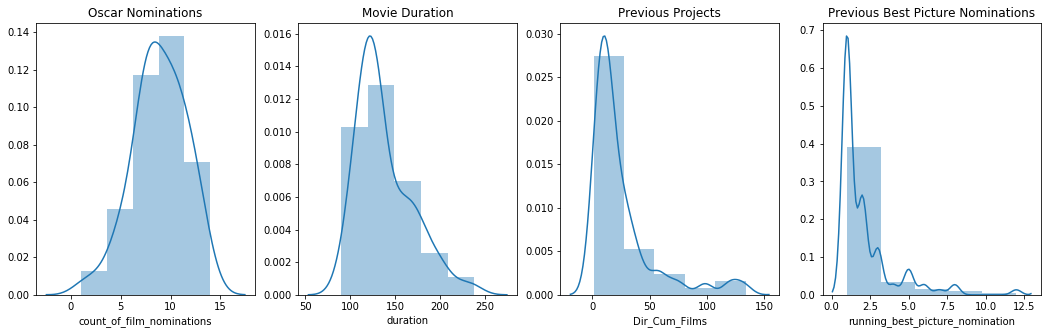

In [9]:
# visualising some of the properties of winners

fig, ax = plt.subplots(nrows=1,
                       ncols=4,
                       figsize=(18,5))

sns.distplot(winners.count_of_film_nominations, bins=5, ax=ax[0])
ax[0].set_title("Oscar Nominations");

sns.distplot(winners.duration, bins=5, ax=ax[1])
ax[1].set_title("Movie Duration");

sns.distplot(winners.Dir_Cum_Films, bins=5, ax=ax[2])
ax[2].set_title("Previous Projects");

sns.distplot(winners.running_best_picture_nomination, bins=5, ax=ax[3])
ax[3].set_title("Previous Best Picture Nominations");

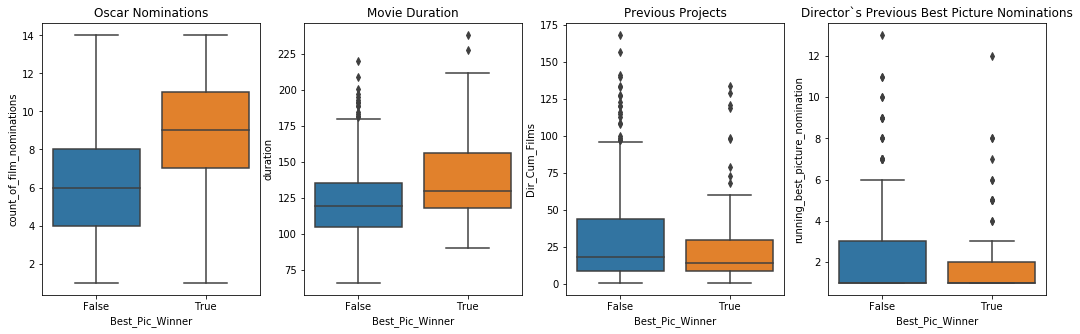

In [15]:
# comparison of nominated and winning films


fig, ax = plt.subplots(nrows=1,
                       ncols=4,
                       figsize=(18,5))

sns.boxplot(dataset.Best_Pic_Winner, dataset.count_of_film_nominations,ax=ax[0])
ax[0].set_title("Oscar Nominations");

sns.boxplot(dataset.Best_Pic_Winner, dataset.duration,ax=ax[1])
ax[1].set_title("Movie Duration");

sns.boxplot(dataset.Best_Pic_Winner, dataset.Dir_Cum_Films, ax=ax[2])
ax[2].set_title("Previous Projects");

sns.boxplot(dataset.Best_Pic_Winner, dataset.running_best_picture_nomination,ax=ax[3])
ax[3].set_title("Director`s Previous Best Picture Nominations");

In [12]:
dataset.Producer = dataset.Producer.replace('Yes',1).replace('No', 0)

#  AWARDS

In [216]:
dataset[['Globes_Best_Dir_Winner','Globes_Best_Pic_Winner']]=(dataset[['Globes_Best_Dir_Winner','Globes_Best_Pic_Winner']]
                                                              .replace('TRUE','Winner').replace('FALSE','Nominee'))

In [217]:
dataset[['bafta','cannes']]=dataset[['bafta','cannes']].replace(0,'Nominee')
dataset[['bafta','cannes']]=dataset[['bafta','cannes']].replace(1,'Winner')

In [218]:
dataset[['bafta','cannes','Globes_Best_Dir_Winner','Globes_Best_Pic_Winner','DGA_Winner']] = (
    dataset[['bafta','cannes','Globes_Best_Dir_Winner','Globes_Best_Pic_Winner','DGA_Winner']]
    .replace('x',0)
    .replace('Nominee',1)
    .replace('Winner',2)).astype(int)

In [219]:
# How many directors won golden globes and director guild awards?

dataset[(dataset.DGA_Winner ==  2) & (dataset.Globes_Best_Dir_Winner == 2)]
# 33 movies (so about a third) of pictures nominated for best picture were directed by people who won DGA and Globes for directing for the same movie. 
dataset[(dataset.DGA_Winner ==  2) & (dataset.Globes_Best_Dir_Winner == 2) & (dataset.Best_Pic_Winner == True)]
#26 of these films won. 

dataset[(dataset.bafta == 2) & (dataset.Best_Pic_Winner ==True)]
# 19 movies

,year_film,year_ceremony,ceremony,category,film,Best_Pic_Winner,imdb_title_id,genre,duration,country,...,Music,Action,Crime,Family,Fantasy,Sport,Biography,Comedy,History,Western
221,1960,1961,33,BEST MOTION PICTURE,THE APARTMENT,True,tt0053604,"Comedy, Drama, Romance",125,USA,...,0,0,0,0,0,0,0,1,0,0
230,1962,1963,35,BEST PICTURE,LAWRENCE OF ARABIA,True,tt0056172,"Adventure, Biography, Drama",228,UK,...,0,0,0,0,0,0,1,0,0,0
239,1963,1964,36,BEST PICTURE,TOM JONES,True,tt0057590,"Adventure, Comedy, History",129,UK,...,0,0,0,0,0,0,0,1,1,0
268,1969,1970,42,BEST PICTURE,MIDNIGHT COWBOY,True,tt0064665,"Drama, Western",113,USA,...,0,0,0,0,0,0,0,0,0,1
305,1977,1978,50,BEST PICTURE,ANNIE HALL,True,tt0075686,"Comedy, Romance",93,USA,...,0,0,0,0,0,0,0,1,0,0
326,1981,1982,54,BEST PICTURE,CHARIOTS OF FIRE,True,tt0082158,"Biography, Drama, Sport",125,UK,...,0,0,0,0,0,1,1,0,0,0
331,1982,1983,55,BEST PICTURE,GANDHI,True,tt0083987,"Biography, Drama, History",191,"UK, India",...,0,0,0,0,0,0,1,0,1,0
389,1993,1994,66,BEST PICTURE,SCHINDLER'S LIST,True,tt0108052,"Biography, Drama, History",195,USA,...,0,0,0,0,0,0,1,0,1,0
400,1996,1997,69,BEST PICTURE,THE ENGLISH PATIENT,True,tt0116209,"Drama, Romance, War",162,"USA, UK",...,0,0,0,0,0,0,0,0,0,0
413,1998,1999,71,BEST PICTURE,SHAKESPEARE IN LOVE,True,tt0138097,"Comedy, Drama, History",123,"USA, UK",...,0,0,0,0,0,0,0,1,1,0


# Correlations

In [220]:
round(dataset.corr(),2)

,year_film,year_ceremony,ceremony,Best_Pic_Winner,duration,Dir_Cum_Films,count_of_film_nominations,nominated_for_best_director,best_directing_nomination_sum,best_directing_win_sum,...,Music,Action,Crime,Family,Fantasy,Sport,Biography,Comedy,History,Western
year_film,1.00,1.00,1.00,0.01,0.26,-0.44,0.24,0.12,0.03,-0.06,...,-0.13,0.08,0.08,-0.07,0.07,0.06,0.19,-0.04,0.04,-0.07
year_ceremony,1.00,1.00,1.00,0.01,0.26,-0.44,0.24,0.12,0.03,-0.06,...,-0.13,0.08,0.08,-0.08,0.07,0.06,0.19,-0.04,0.04,-0.07
ceremony,1.00,1.00,1.00,0.01,0.26,-0.44,0.24,0.12,0.03,-0.06,...,-0.13,0.08,0.08,-0.08,0.07,0.06,0.19,-0.04,0.04,-0.07
Best_Pic_Winner,0.01,0.01,0.01,1.00,0.21,-0.06,0.38,0.31,0.09,0.30,...,0.01,-0.07,0.03,0.04,-0.05,0.05,0.02,-0.04,0.02,0.04
duration,0.26,0.26,0.26,0.21,1.00,-0.10,0.46,0.14,0.29,0.25,...,-0.05,0.03,-0.01,0.04,0.05,-0.00,0.18,-0.24,0.22,0.01
Dir_Cum_Films,-0.44,-0.44,-0.44,-0.06,-0.10,1.00,-0.12,-0.05,0.26,0.22,...,0.11,0.00,-0.08,0.04,-0.04,-0.07,0.00,0.03,-0.02,0.10
count_of_film_nominations,0.24,0.24,0.24,0.38,0.46,-0.12,1.00,0.49,0.29,0.27,...,-0.01,0.04,0.03,0.05,0.07,0.01,0.09,-0.14,0.09,0.02
nominated_for_best_director,0.12,0.12,0.12,0.31,0.14,-0.05,0.49,1.00,0.37,0.20,...,-0.06,-0.07,0.11,0.02,0.01,0.03,-0.00,-0.05,-0.05,0.05
best_directing_nomination_sum,0.03,0.03,0.03,0.09,0.29,0.26,0.29,0.37,1.00,0.64,...,-0.10,-0.03,0.04,0.07,0.03,-0.02,0.05,-0.02,0.03,0.03
best_directing_win_sum,-0.06,-0.06,-0.06,0.30,0.25,0.22,0.27,0.20,0.64,1.00,...,-0.07,-0.03,-0.06,0.04,0.02,-0.02,0.03,-0.01,0.09,0.08


In [221]:
data_correlations = dataset[['Best_Pic_Winner', 'duration', 'Dir_Cum_Films',
       'Producer','count_of_film_nominations', 'nominated_for_best_director',
       'prior_best_directing_nominations','prior_best_directing_wins',
       'running_best_picture_nomination','Globes_Best_Dir_Winner', 
       'Globes_Best_Pic_Winner', 'bafta', 'cannes','DGA_Winner']]

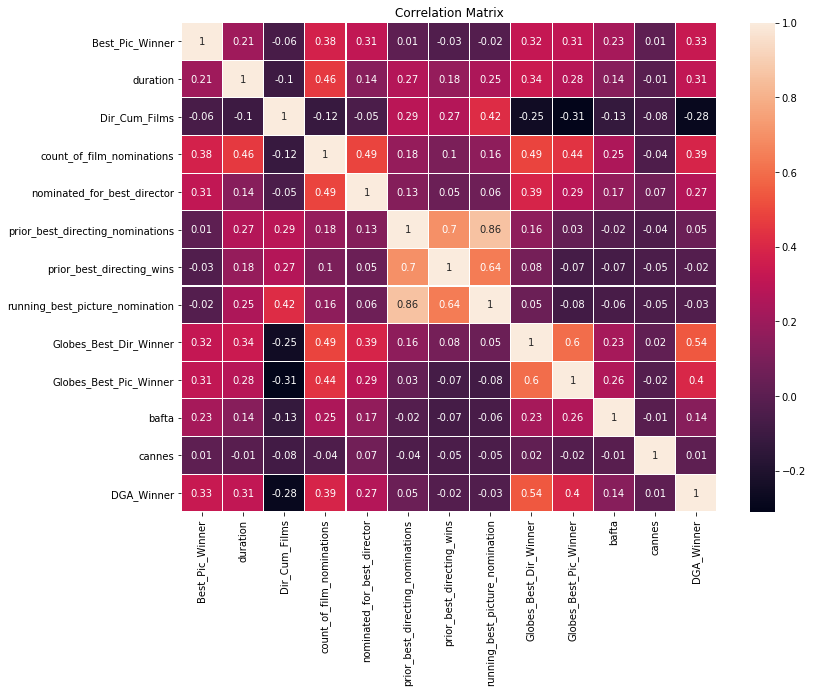

In [230]:
fig, ax = plt.subplots(figsize=(12,9))

sns.heatmap(round(data_correlations.corr(),2),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

# Genres

In [267]:
genres = dataset[['Best_Pic_Winner','Drama', 'Adventure', 'War', 'Musical', 'Sci-Fi',
       'Thriller', 'Romance', 'Animation', 'Film-Noir', 'Horror', 'Mystery',
       'Music', 'Action', 'Crime', 'Family', 'Fantasy', 'Sport', 'Biography',
       'Comedy', 'History', 'Western']]

In [268]:
genres1 = genres.melt(id_vars = 'Best_Pic_Winner',
                      var_name='Genres',
                      value_name= 'Counts')

In [283]:
genres2 = genres1.groupby(['Best_Pic_Winner','Genres'])['Counts'].sum().reset_index()
genres2 =genres2.sort_values('Counts',ascending=False)

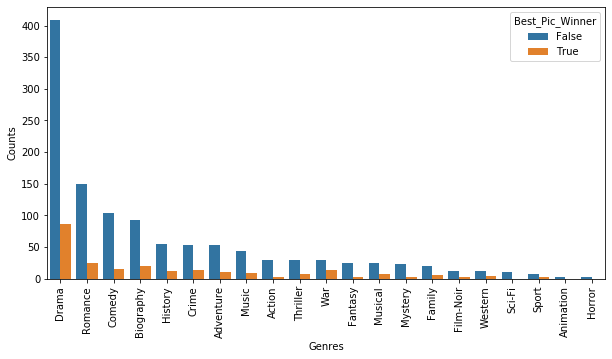

In [285]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(10,5))

sns.barplot(genres2.Genres, genres2.Counts, hue=genres2.Best_Pic_Winner)
plt.xticks(rotation=90);

Drama is the most common genre, and over 70% of nominated movies have elements of drama. Consequently, drama movies also most commonly win. However,when relative proportions of other genres are considered, nominated war movies have a higher
'success' rate. Nevertheless, these are not 'real' genres. They are assigned by imdb, and most of films have 2 or 3 genres.

